### 텐서플로우 음성인식 경진대회
- 수천명의 목소리로 이루어진 30개의 짧은 단어들에 대한 1초 가량의 65,000개 이상의 1초 가량의 음성 데이터셋
- 이 경진대회를 통해 30개의 짧은 명령어를 90% 가량의 정확도로 맞추는 모델이 공개됨.
- 대회 목적은 음성 클립에서 무슨 단어가 들리는 지를 예측하는 경진대회
- 약 1초 길이의 음성 클립은 10개의 단어(yes, no, up, down, left, right, on, off, stop, go)와 무음을 의미하는 silence 그리고 10 개단어에 속하지 않는 unknown 총 12개로 분류된다.
- _background_noise_ 폴더에는 6개의 생활 소음 음성 데이터가 존재 
- train/ 폴더 아래에는 경진대회용 훈련 데이터가 총 23,682개 존재한다.
- test 폴더 아래에는 경진대회 제출용으로 158,539개의 음성 파일이 해시값을 포함한 파일명으로 존재함.

### 평가척도
- 테스트 데이터는 총 158,539개의 음성클립으로 구성되며 캐글에 제출해야 하는 갓은 158,539개 음성 클립에 대한 분류값이다.
- 이번 경진대회에서 사용되는 평가 척도는 다중 클래스 정확률(Multicalss Accuracy)
- 다중 클래스 정확률이란 3개 이상의 다중 클래스 예측의 정답 비율 ex) 5개중 3개 맞췄을 때 60% 
- 최고점 0.91060점

### 주요 접근
- 음성 데이터를 스펙트로그램 형태로 변환하여, CNN 계열 딥러닝 모델로 학습한다.
- CNN 계열 딥러닝 모델을 사용하는 이유는 훈련, 테스트셋에 있는 음성 데이터의 길이가 모두 1초 가량 고정되어 있기 때문에
- 또한 단위 모델로는 어렵기 때문에 배깅 앙상블 준 지도학습 기법을 통해 성능 향상을 도모함.

### 데이터
- 구글이 공개한 '음성 명령 데이터셋'에서는 총 30개의 단어에 대한 음성 데이터가 포함되지만, 이번 경진대회에서는 그중 10개의 단어에 대한 음성 데이터와 배경 농즈 음성 데이터를 담은 'back_ground_noise_' 데이터를 사용한다.

### 접근방법
- 음성 파형(Sound Wave)를 수치화하여 모델에 공급(feed) 
- RGB 채널별로 0~255 사이의 픽셀값으로 수치화하여 모델에 공급하듯이, 음성 파형 데이터 또한 모델에 공급할 수 있게 수치화 해야함.
- 음성 파형 데이터는 하나의 선으로 그려지는데 대부분의 오디오 파일은 음성 파형 데이터를 모두 저장하지 않고, 음성 품질을 보존하는 수준에서 일부 데이터만을 샘플링한다. 
- CD 오디오의 경우 44.1kHz (1초당 44,100번의 데이터 표본 추출)의 샘플링 빈도(sampling rate)를 통해 원음에 가까운 데이터를 보존한다.
- 일반적으로 음성 인식 데이터는 16kHz(1초당 16,000개) 정도면 인간의 음성을 구분하는데 충분하다.
- 샘플링된 음성 파형 데이터를 그대로 머신러닝 모델에 사용하기에는 부족하며

### 사람이 음성을 인식하는 청각 기능 2가지
(1) 장소이론(place theory)
- 시간상 진폭 축의 변화를 통해 음성을 인식한다는 이론. 시간을 x축으로 두고, 1초라는 시간 속에서 음성 파형의 변화를 감지하여 음성을 구분

(2) 주파수 이론(temporal theory)
- 주파수 이론은 x축을 주파수로 두었을 때의 스펙트럼의 변화를 감지하여 음성을 구분

### 스펙트로그램(spectrogram)
- 두 가지 이론이 제시하는 시간상의 음성 파형의 변화와 주파수상의 스펙트럼(spectrum)의 특징을 모두 결합하여 시간축과 주파수 상에서 진폭의 차이를 나타낸다.
- 사람이 음성을 인식하는 두 가지 이론의 정보가 즉 하나로 함축된 데이터인 것
- 푸리에 변환(Fourier Transform) 이라는 수학 연산을 통해 음성 파형을 스펙트로그램으로 변환할 수 있다.
- 음석 인식 모델링에서는 스펙트로그램을 기본 데이터로 사용하며 스펙트로그램으로 전처리를 수행하여 음석 인식에 필요한 중요한 정보들을 효과적으로 추출한다.
- 전처리종류에는 스펙트로그램에 log-scale을 씌운 로그-스펙트로그램(log-spectrogram), mel-scale을 씌운 멜-스펙트로그램(mel-spectorgram)
- mel-scale, log-scale, cosine 변환을 수행하는 MFCC(Mel-Frequency cepstral coefficients)등이 있다.

### 모델 RNN 대신 CNN 사용 이유
- 음성인식에서는 기본적으로 입력값의 길이가 가변적이라는 가정을 하는데, 그럴 경우 RNN계열의 모델링이 일반적인 선택
- 텐서플로 음성인식 경진대회는 모든 음성 데이터가 1초 가량의 길이를 가지는 정적 데이터 이므로 CNN 계열의 모델링으로 수행

### 앙상블
- 단일 모델로는 높은 성능을 내기 어렵기 떄문에, 배깅 앙상블(Bagging Ensemble) 기법을 사용.
- 동일한 데이터와 동일한 딥러닝 모델을 서로 다른 random_seed를 기반으로 학습을 수행하여, 미세하게 다른 결과물을 얻어냄.
- 들어오는 데이터의 순서를 random_seed로 바꿔, N개의 모델 결과물을 앙상블하면, 단일 모델보다 우수한 성능을 보임.

### 준 지도학습(Semi-Supervised)
- 레이블이 존재하는 데이터(x,y)를 기반으로 모델 M을 학습한 후에, 레이블이 없는 변수 z의 레이블 y을 모델 M을 기반으로 예측해봄는 것.
- 데이터 (z, y)의 품질은 모델 M의 성능에 좌우되지만, 레이블이 존재하는 데이터(x,y)의 양이 부족할 경우에 상대적으로 손쉽게 수집할 수 있는 변수 z를 통해 추가로 생성한 데이터 (z,y)가 모델 학습에 도움이 되는 경우도 있음.


In [2]:
import IPython.display as ipd
from scipy.io import wavfile

In [3]:
# yes단어의 해당 파일을 이용해서 에시로 해봄.
# 음성 파일 경로를 지정한다
data_dir = 'C:/Users/urse/Desktop/dataset/tensorflow-speech-recognition-challenge/'
train_audio_path = data_dir + 'train/audio/'
filename = 'yes/e4b02540_nohash_0.wav'

# 음성 데이터 읽어오기
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

# Player 실행
ipd.Audio(samples, rate=sample_rate)

sample rate 16000


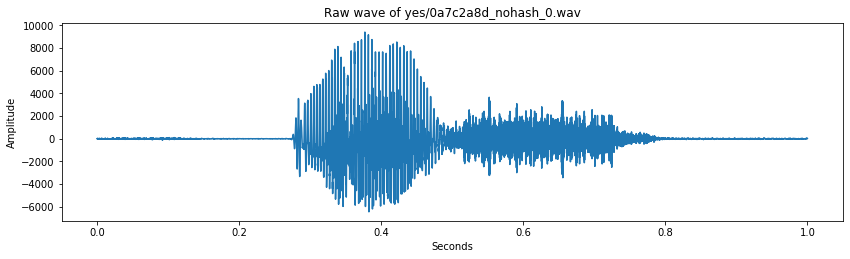

In [4]:
import numpy as np
from scipy import signal
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import librosa
import librosa.display 

# 음성 파일 경로를 지정한다
data_dir = 'C:/Users/urse/Desktop/dataset/tensorflow-speech-recognition-challenge/'
train_audio_path = data_dir + 'train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

# sample_rate = 16000 -> 초당 16,000개의 음성 파형 데이터를 추출한다는 뜻
print('sample rate', sample_rate)

# 음성 파형 (sound wave)를 시각화한다
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Seconds')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

Text(0.5, 0, 'Seconds')

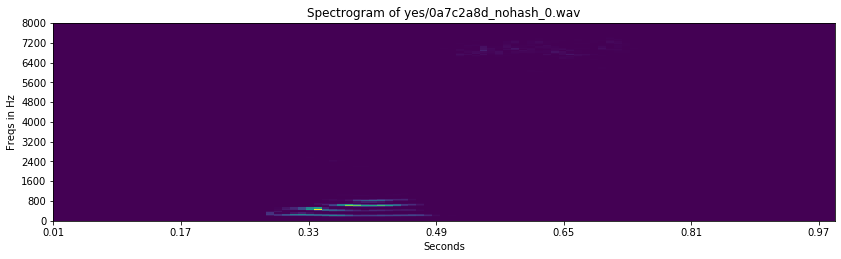

In [5]:
# 스팩트로그램 결과
# 낮은 음역과 높은 음역에서의 값의 분포가 불균형하며
# 일부 영역(0.33초 ~ 0.45초 부근)에만 정보가 담겨있다.

# 스펙트로그램을 계산하는 함수
def specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, spec.T.astype(np.float32)

# 스펙트로그램을 시각화한다
freqs, times, spectrogram = specgram(samples, sample_rate)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax1.set_yticks(freqs[::16])
ax1.set_xticks(times[::16])
ax1.set_title('Spectrogram of ' + filename)
ax1.set_ylabel('Freqs in Hz')
ax1.set_xlabel('Seconds')

Text(0.5, 0, 'Seconds')

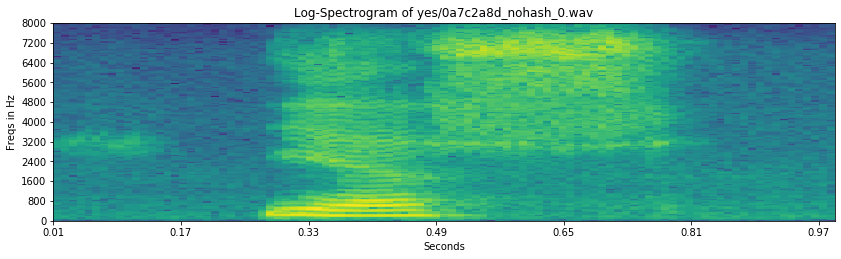

In [6]:
# log-스펙트로그램을 계산하는 함수
# 인간의 목소리 구별시 유의미한 낮음 주파수 영역을 강조하고 높은 주파수 영역을 상대적으로 덜 강조
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

# log-스펙트로그램을 시각화한다
freqs, times, log_spectrogram = log_specgram(samples, sample_rate)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.imshow(log_spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax1.set_yticks(freqs[::16])
ax1.set_xticks(times[::16])
ax1.set_title('Log-Spectrogram of ' + filename)
ax1.set_ylabel('Freqs in Hz')
ax1.set_xlabel('Seconds')

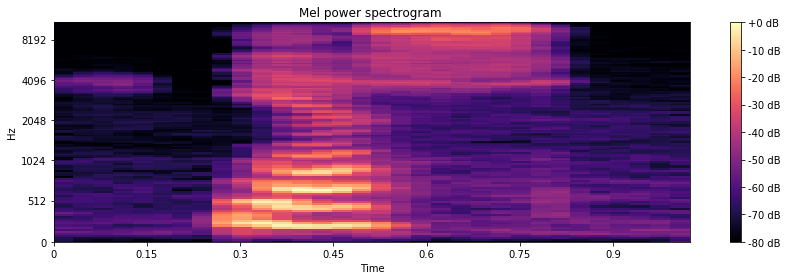

In [7]:
# mel-스펙트로그램을 계산하는 함수
# 인간의 목소리 구별시 유의미한 낮음 주파수 영역을 강조하고 높은 주파수 영역을 상대적으로 덜 강조
# librosa 라이브러리의 melspectrogram()와 로그 함수를 씌워 주파ㅜ별 값의 분포를 변환
# log-spectrogram과 비교하면 비슷한 시간대에 주파수가 강조되지만, 패턴이 미세하게 다른 것을 확인 할 수 있음.
S = librosa.feature.melspectrogram(samples.astype(np.float16), sr=sample_rate, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

# mel-스펙트로그램을 시각화한다
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

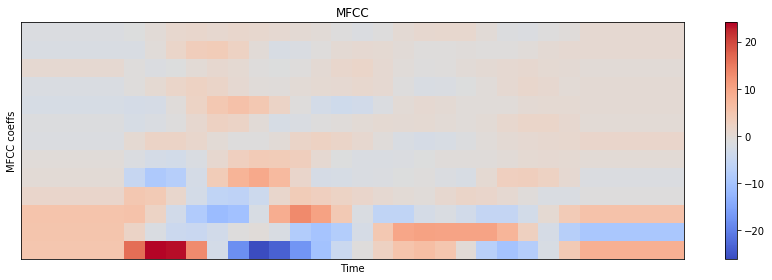

In [8]:
# MFCC를 계산하는 함수
# mel-스페긑로그램 값에 다시 한번 연산을 가하여 상위 레벨 변수를 추출하는 MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# MFCC를 시각화한다
plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

### 데이터 노이즈 제거
- yes/fd395b74_nohash_0.wav - 깔끔한 yes가 들리는 오디오 파일이 대부분
- yes/fd395b74_nohash_1.wav - 아무소리도 없는데 yes로 구분되어 있는 훈련데이터
- yes/fd395b74_nohash_2.wav - 동일인의 목소리임에도 잡음이 생각보다 강하게 섞여있음.
=> 데이터 차원 축소 기법으로 자주 사용되는 PCA(Principal Component Analysis) 주성분 기법을 통해 이상값을 찾음
- 차원 축소 기법을 ㅏ용한다는 것은 16,000 음성파일에 초당 16,000개의 값이 존재하는 것을 푸리에 변환 연산을 수행하여 하나의 음성 파일을 8,000개의 값으로 표현하게 하고
- 이 8,000개의 값중에서 가장 중요하게 여겨지는 정보를 2차원으로 축소하여 표현
- 시각화 한것중 가장 멀리 떨어져 있는 음성 파일을 이상 값이라고 가정하고 진행하는 것.


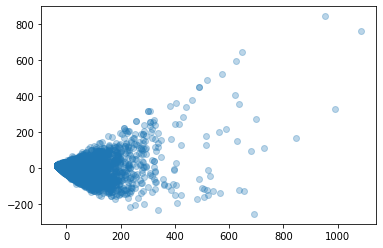

In [9]:
import numpy as np
from scipy.fftpack import fft
import os
from sklearn.decomposition import PCA

def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])
    return xf, vals

train_audio_path = 'C:/Users/urse/Desktop/dataset/tensorflow-speech-recognition-challenge/train/audio/'
dirs = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
fft_all = []
names = []
for direct in dirs:
    waves = [f for f in os.listdir(os.path.join(train_audio_path, direct)) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + direct + '/' + wav)
        if samples.shape[0] != sample_rate:
            samples = np.append(samples, np.zeros((sample_rate - samples.shape[0], )))
        x, val = custom_fft(samples, sample_rate)
        fft_all.append(val)
        names.append(direct + '/' + wav)

fft_all = np.array(fft_all)

# 데이터를 정규화한다
fft_all = (fft_all - np.mean(fft_all, axis=0)) / np.std(fft_all, axis=0)

# PCA를 통해 2차원으로 축소한다
pca = PCA(n_components=2)
fft_all = pca.fit_transform(fft_all)

# 축소된 데이터를 시각화한다
plt.scatter(x=fft_all[:,0], y=fft_all[:,1], alpha=0.3)

In [10]:
# x축 성분이 800보다 큰 4개의 값을 이상값이라고 가정하고, 파일명 확인
# 실제로 들어보면 yes혹은 stop 음성 전후에 강한 소음이 섞여 있음.
# 이상값으로 여겨지는 음성 데이터의 수준으로 보아, 이번 경진대회에 사용되는 데이터 품질은 나쁘지 않음을 알수 있음.
for i in np.where(fft_all[:,0] > 800)[0]:
    print(names[i])

yes/5165cf0a_nohash_0.wav
yes/617de221_nohash_1.wav
yes/e4b02540_nohash_0.wav
stop/de41f895_nohash_1.wav


### 데이터 어그멘테이션
- 부족한 데이터의 양을 보완하기 위하여, 원본 데이터의 정체성을 해치지 않는 수준의 변형을 가하여, 모델이 학습할 수 있는 데이터를 증가시키는 방법
- 예를 들어 _background_noise_ 폴더에 포함된 다양한 소음 데이터를 추출하여 'yes음성 데이터에 얹는 것만으로도 기존 훈련 데이터에 존재하지 않은 새로운 'yes'음성 데이터가 생김
- 원본 음성 데이터에 _backgorund_noise_의 소음을 랜덤하게 추가하고, 음성의 위치를 랜덤하게 이동하고, 파형의 높이를 변형하여 Data Augmentation 수행

In [11]:
# 데이터 어그멘테이션을 통한 새롭게 생성된 'yes파일'
import IPython.display as ipd
from scipy.io import wavfile
import random
import os

# 음성 파일 경로를 지정한다
data_dir = 'C:/Users/urse/Desktop/dataset/tensorflow-speech-recognition-challenge/'
train_audio_path = data_dir + 'train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'

# 음성 데이터을 읽어온다
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

# 음성 위치를 200ms~800ms 사이의 값으로 랜덤하게 이동한다
shift_range = random.randint(200, 800)
shift = sample_rate * 100 // 1000
shift = random.randint(-shift, shift)
a = -min(0, shift)
b = max(0, shift)
sample_aug = np.pad(samples, (a, b), "constant").astype(np.float16)
sample_aug = sample_aug[:len(sample_aug) - a] if a else sample_aug[b:]

# 제공된 배경 소음 중, 랜덤으로 1초 가량의 소음을 추가한다
max_ratio = random.choice([0.1, 0.5, 1, 1.5])
noise_filenames = [f for f in os.listdir(os.path.join(train_audio_path, '_background_noise_')) if f.endswith('.wav')]
noise_filename = noise_filenames[random.randint(0, len(noise_filenames)-1)]
_, noise_samples = wavfile.read(str(train_audio_path) + '_background_noise_/' + noise_filename)
start_idx = random.randint(0, len(noise_samples) - 1 - sample_rate)
noise_samples = noise_samples[start_idx:(start_idx + sample_rate)]
max_ratio = random.choice([0.1, 0.5, 1, 1.5])
sample_aug += max_ratio * random.random() * noise_samples.astype(np.float16)

# 파형의 높이를 스케일링한다
scale = random.uniform(0.75, 1.25)
sample_aug *= scale

# Data Augmentation을 취한 음성 파일을 들어본다
ipd.Audio(sample_aug, rate=sample_rate)

c:\users\urse\anaconda3\envs\untitled\lib\site-packages\ipykernel_launcher.py:28: WavFileWarning: Chunk (non-data) not understood, skipping it.


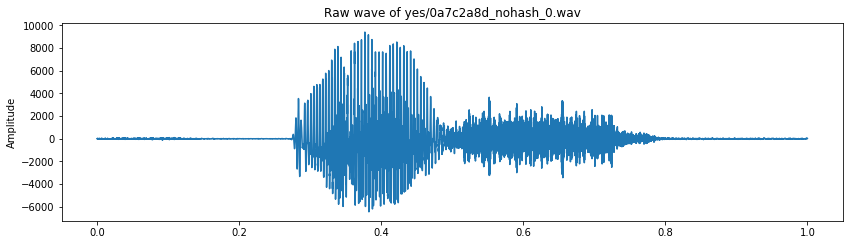

In [12]:
# Augmentation 전과 후를 비교하여 그래프 출력
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

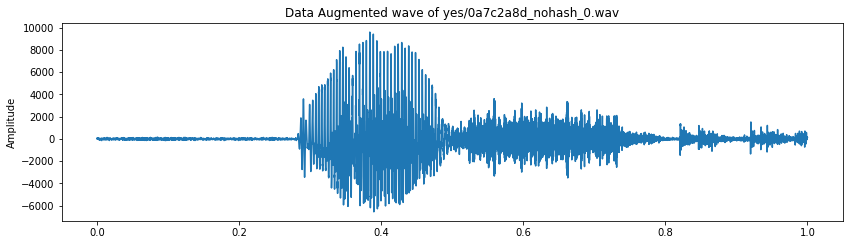

In [13]:
# Augmentation 전과 후를 비교하여 그래프 출력
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Data Augmented wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(sample_aug), sample_rate), sample_aug)

### 탐색적 데이터 분석 요약
- 우리에게 주어진 음성 데이터의 양과 데이터 구조를 파악할 수 있었음.
- 예측해야 하는 12개의 분류별로 각 2000개 + 정도의 음성파일이 제공되며, 테스트 데이터로는 16만 가량의 음성 파일이 존재함.
- python scipy 라이브러리를 사용하여 음성 파형을 추출하고, 훈련데이터와 테스트 데이터를 직접 들어보아야 함.
- 음성 데이터를 기반으로 딥러닝 모델에 학습시 읽어온 음성 파형을 그대로 사용할 수도 있지만, 푸리에 변환이라는 특수한 연산을 수행하여
- 주파수와 음역대별로 시그널을 추출하는 스펙트로그램을 중 변수로 사용하기도 함
- 흔히 사용되는 log-scale 스펙트로그램, mel-scale 스펙트로그램, MFCC 변수를 직접 계산하고 시각화 해보았음.
- 또한 모든 데이터를 직접 들을 수는 없으니 PCA를 이용한 차원 축소 기법으로 기존 훈련 데이터와 속성이 다른 이상갑들을 몇개 추려서 직접 귀로 들어보았음
- 부족한 데이터양을 보완하기 위해 데이터 어그멘테이션 방법을 구축해서 분류별 2000+개밖에 없었지만 모델에는 더 많은 양의 데이터를 사용 할 수 있었음.
